<a id="Topo"></a><b><p style="text-align:center;font-size:24px">Algoritmos de Aprendizado Profundo </p> </b> 
<p style="text-align:center;font-size:6px"></p>
<b><p style="text-align:center;font-size:16px"> Resumo - Módulo 2 </p> </b>

---

<b><p style="text-align:center;font-size:24px"> Índice </p> </b> 

**[I - Redes Convolucionais](#CNN)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1. Introdução](#Intro)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1.1. ](#)**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[2. Convoluções](#Conv)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[2.1. A operação de convolução](#Convolucao)**    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[2.2. Função de ativação ReLU](#ReLU)**    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[2.3. Filtros](#Filtros)**    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[3. Padding](#Padding)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[3.1. ](#)**    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[4. Pooling](#Pooling)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[4.1. ](#)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[5. Arquitetura típica de uma CNN ](#Arquitetura)**    

**[II - Modificações das CNN](#Mods)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1. Dilated](#Dilated)**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1.1. ](#)**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[2. Separate](#Separate)**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[2.1. ](#)**    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[3. Decompositions](#Decomposition)**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[3.1. ](#)**     

**[III - Classificação com arquiteturas profundas](#Classificacao)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1. ](#)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1.1. ](#)**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[2. ](#)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[2.1. ](#)**      


**[IV - CNNs na prática](#Pratica)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1. ](#00)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1.1. ](#00)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1.2. ](#00)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1.3. ](#00)**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**[1.4. ](#00)**  


**[Lista de exercícios 1](#Lista1)**  
**[Lista de exercícios 2](#Lista2)**  
**[Lista de exercícios 3](#Lista3)**  

---

Princípio de Machine Learning:
Se você vai treinar um modelo em cima de dados que seguem uma dada distribuição de features, idealmente você deveria usar esse modelo para dados com a mesma distribuição. Se mudar essa distribuição, seu modelo não vai funcionar tão bem quanto para os dados de treino.

Normalmente, o uso de ensembles melhora o resultado

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

In [2]:
from scipy import stats
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display

# I - Redes convolucionais <a id = "CNN"></a> 

## 1 - Introdução <a id = "Intro"></a> 

### 1.1.  Alguumas das motivações para CNNs <a id = ""></a> 

Quando pensamos em redes neurais, o exemplo mais simples que podemos imaginar é o perceptron multicamadas, ou MLP. Nele, todos os nós de uma dada camada se ligam a todos os nós da camada posterior, e por isso esta rede é chamada de densa ou totalmente conectada. Isso resulta num alto número de parâmetros, mesmo para redes pequenas. Quando observamos a figura abaixo, vemos que da camada de entrada (azul) para a primeira camada oculta (verde), possuímos 8 parâmetros, ou 10 se considerarmos os vieses. Da primeira para a segunda camada oculta (amarela), temos mais 4 (6 com vieses) parâmetros, e da segunda camada oculta para a saída temos mais 2 (3 com vieses) parâmetros. Desta forma, temos ao todo 19 parâmetros nesta rede. cuja entrada é 1x4

<img src="Figuras/F5.png" alt="MLP" width="500"/>   

Agora imagine que tenhamos uma imagem 32 x 32 pixels em RGB. Nossa entrada então passa a ter tamanho 32 x 32 x 3 (esta última dimensão corresponde ao número de canais, R, G e B). Se formos utilizar uma rede MLP como a da figura acima para analisar tal imagem, passaremos a ter (32 x 32 x 3 + 1) x 2 parâmetros da entrada para a primeira camada oculta, ou seja, 6146 parâmetros. as demais camadas seguem com o mesmo número de parâmetros de forma que a rede passa a ter um total de 6155 parâmetros.

Como veremos adiante, as redes neurais convolucionais são uma forma de reduzir significativamente os parâmetros necessários para realizar as análises. Outra diferença que torna as redes convolucionais superiores ao MLP para aplicações envolvendo imagens é o fato do MLP não preservar as relações espaciais da entrada, uma vez que elas devem ser convertidas em vetores. Por serem tridimensionais, os filtros das camadas convolucionais não sofrem deste mesmo problema, permitindo que relações espaciais sejam consideradas nas análises. Por fim, o pré-processamento exigido em uma CNN é muito menor em comparação a outros algoritmos de classificação

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

## 2 - Convoluções <a id = "Conv"></a> 

A arquitetura de uma CNN é análoga àquela do padrão de conectividade dos Neurônios no Cérebro Humano e foi inspirada na organização do Córtex Visual. Os neurônios individuais respondem a estímulos apenas em uma região restrita do campo visual conhecida como Campo Receptivo. Uma coleção de tais campos se sobrepõe para cobrir toda a área visual. Na rede convolucional, os filtros podem ser considerados como uma analogia do campo receptivo. Dessa forma, podemos dizer que um dos papeis da CNN é o de reduzir as imagens a uma forma mais fácil de processar, sem perder recursos que são essenciais para obter uma boa previsão.

### 2.1. A operação de convolução <a id = "Convolucao"></a> 

Com as redes convolucionais, conseguimos reduzir significativamente o número de parâmetros ao utilizar **filtros**, que são os neurônios deste tipo de rede. Estes filtros nada mais são que matrizes (ou tensores) que varrem a camada anterior, executando operações de multiplicação de cada um de seus elementos pelos elementos correspondentes na matriz, somando todos os valores obtidos e submetendo-os a uma função de ativação. A aplicação de um filtro sobre uma imagem gera um mapa de ativação. este procedimento recebe o nome de convolução, e é ilustrado pela figura abaixo.

<img src="https://glassboxmedicine.files.wordpress.com/2019/07/convgif.gif?w=616" alt="Filter" width="500"/> 
<p style="text-align:center; font-size:12px"><b>fonte:</b> glassboxmedicine </p>

Com este novo procedimento, as redes passam a ter uma quantidade significativamente menor de parâmetros. Neste caso, cada filtro terá o número de parâmetros equivalente à sua dimensão, ou seja, um filtro 5x5 aplicado a uma imagem RGB possui 5x5x3 + 1 parâmetros treináveis, incluindo o viés. A cada camada, um determinado número de filtros é aplicado, gerando novos volumes que serão a entrada da camada seguinte.

Comparando as CNN aos MLP, podemos ver a dimensão na redução no número de parâmetros da rede, o que é mais pronunciado em redes mais complexas. Desta forma, as redes convolucionais tornam-se muito mais eficientes no processamento de entradas grandes, como é o caso das imagens.

Nesta rede, os hiperparâmetros são as dimensões dos filtros e o número de filtros. Entretanto, uma das dimensões do filtro sempre será fixa e definida pelas entradas, que é a profundidade. Se a entrada é uma imagem do tipo RGB, então teremos uma profundidade de 3, e os filtros devem respeitar isso. A dimensão do mapa de ativação gerado depende do tamanho da entrada, do tamanho do filtro e do tamanho do passo, da seguinte forma:

$$ m = \frac{n - f}{s} + 1$$

onde, M é a dimensão do mapa de ativação, n é a dimensão da entrada, f é a dimensão do filtro e s é o tamanho do passo (stride).

Por fim, vale ressaltar que o objetivo da Operação de convolução é extrair os recursos de alto nível, como bordas. Quanto mais fundo na rede, mais complexos se tornam os padrões identificados.

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

### 2.2. Função de ativação ReLU <a id = "ReLU"></a> 

Tradicionalmente, a função de ativação utilizada na operação de convolução é a ReLU. Esta função de ativação complementa o objetivo da rede convolucional de destacar características interessantes da entrada pois com ela é possível zerar os sinais fracos ou negativos, mantendo somente os sinais fortes de cada filtro na camada de ativação correspondente. Desta maneira, A função de ativação ReLU, juntamente com a operação de pooling que será discutida mais adiante, pode ser considerada como uma forma de remoção de ruídos da entrada ou camada anterior.

<img src="https://www.researchgate.net/profile/Leo-Pauly/publication/319235847/figure/fig3/AS:537056121634820@1505055565670/ReLU-activation-function.png" alt="Filter" width="300"/> 

A função de ativação relu possui a seguinte equação:

$$\text{ReLU} = \max(0,x)$$


<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

### 2.3. Filtros  <a id = "Filtros"></a> 

Os filtros podem ser encarados como matrizes ou tensores. Eles podem ser inicializados com valores aleatórios ou com valores padrão. Independente da escolha de inicialização, é interessante que os valores dentro de cada um dos filtros da rede sejam mutáveis, permitindo que estes sejam aprendidos pela rede à medida que esta é treinada. Isso é aproximadamente equivalente a "deixar a rede tomar a decisão de quais características serão aprendidas". Vale ressaltar, no entanto, que em raros casos onde se conhece bem características dos inputs, pode ser vantajoso inicializar os filtros da camada iniciai com valores padrão. 

#### a) Filtro de Sobbel <a id = "Sobbel"></a> 

Os filtros de Sobbel servem tmabém para a detecção de bordas, porém ele busca realçar as bordas. Já o filtro de Scharr, além de realçar, também gera um pouco de "borrão".


#### b) Filtro de Scharr



Reproduzir exemplos de detecção de bordas.

Fazer script de filtro com mapa de calor.

Exemplo de filtro 3D, ele deve somar todos os valores das três camadas e só retorna um valor. Criar um exemplo de detecção de borda vertical vermelha.

Fazer o script de convolução e testar o conv e conv2D neste exemplo ↓
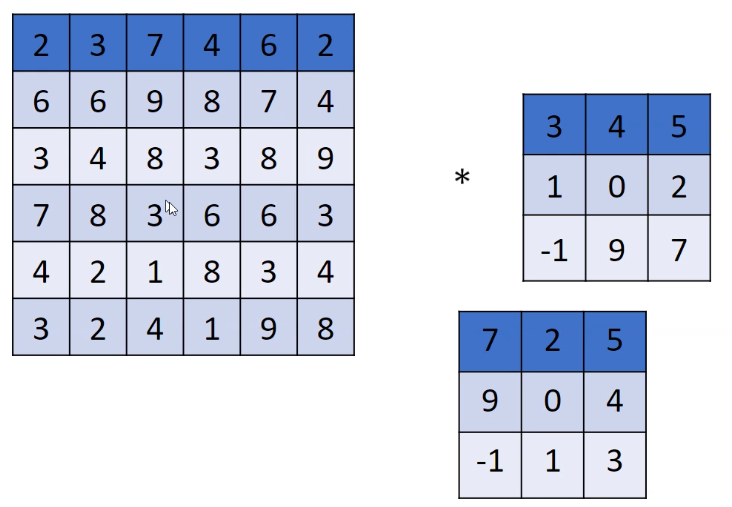

In [1]:
#Script com filtro vertical e horizontal

## 3 - Padding e Stride<a id = "P&S"></a> 


### 3.1.  Padding<a id = "Padding"></a> 

A operação de Padding consiste em adicionar zeros antes e/ou depois da imagem, de forma que a imagem passe a ter dimensões maiores. Isso é útil quando nossa entrada possui tamanho variável, ou quando utilizamos passos (stride) de tamanho maior que 1. Também pode ser útil para permitir a utilização de filtros quadrados em imagens que não são quadradas. Quando usamos padding, a dimensão do mapa de ativação se torna:


$$ m = \frac{n - f + p_{antes} + p_{depois}}{s} + 1$$


O padding traz alguns benefícios, dentre eles temos a preservação do tamanho da imagem e redução da subutilização dos pixels das bordas. Em redes neurais profundas, o padding se torna necessário para evitar que os filtros de ativação se tornem muito pequenos nas camadas intermediárias e finais.



**a)** Padding _same_
Este padding é utilizado para manter o volume de saída com a mesma dimensão do volume de entrada.


**b)** Padding _valid_
Usa somente os píxels válidos da imagem, evitando ao máximo utilizar padding. Como resultado, os featuremaps gerados são sucessivamente menores , o que pode ocasionar perdas significativas de dados mais adiante na rede. 


### 3.2.  Stride<a id = "Stride"></a> 

O stride consiste na quantidade de píxels que o filtro avança (em cada uma das direções) a cada passo. Por padrão, este valor é igual a 1. Neste

Quando o stride resulta numa posição do filtro que ultrapassa os limites da entrada, esta operação é ignorada, o que efetivamente significa que nem toda a imagem será usada.

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

## 4 - Pooling <a id = "Pooling"></a> 


Semelhante à camada convolucional, a camada Pooling é responsável por reduzir o tamanho espacial das features convolvidas e, consequentemente a dimensionalidade do problema analisado. Isso reduz o poder computacional requerido para processar os dados. Além disso, esta operação extrai as características dominantes da sua entrada, mantendo assim o processo efetivo de treinamento do modelo. Em suma, as camadas de pooling visam **acelerar** a computação da rede e **realçar** as features mais importantes.

É importante ressaltar que a operação de Pooling não possui parâmetro treinável algum, somente uma operação será realizada. O Pooling também não possui profundidade, ou seja, a saída de uma camada de pooling terá a mesma profundidade da entrada. Por fim, é muito incomum que se utilize padding em pooling.

Do ponto de vista de numeração de camadas, a camada convolucional e a camada de pooling, juntas, formam a i-ésima camada de uma rede neural convolucional.


### 4.1.  Max Pooling<a id = "MaxP"></a> 

Consiste em passar uma espécie de filtro pela matriz, de maneira que somente o valor máximo é selecionado. Isso é como perguntar para a rede: ao passar esse filtro, você viu algum padrão/característica interessante? Assim como os filtros normais, quando não se usa padding, o mapa de ativação resultante é menor que a entrada.

### 4.2.  Average Pooling<a id = "AveP"></a> 

Consiste em passar uma espécie de filtro pela matriz, de maneira que somente o valor médio dos elementos é retornado. Isso é equivalente a perguntar à rede: o quão predominante é o padrão identificado por este filtro na imagem/sentença? Assim como os filtros normais, quando não se usa padding, o mapa de ativação resultante é menor que a entrada. Geralmente é utilizada ao final, para reduzir o número de parâmetros necessários para a MLP (e softmax) ao final.

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

## 5 - Arquitetura típica de uma CNN  <a id = "Arquitetura"></a> 

Em geral, uma rede convolucional completa possui diversas camadas de convolução alternadas com camadas de Pooling. Ao final da rede, em casos de classirficação, a camada final deve ser uma softmax, com o número de nós equivalente ao número de classes que se deseja identificar. Ocasionalmente, uma camada de convolução pode ser sucedida de outra camada de convolução.

<img src="https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg" alt="Filter" width="700"/> 


É importante reforçar que as etapas do cálculo são as seguintes:
1. Aplica o filtro
2. Soma os resultado no mapa de ativação
3. Aplica o bias a cada elemento do mapa de ativação
4. Aplica a ReLU


<p style="text-align:center; font-size:12px"><b>fonte:</b> Medium </p>

## 6 - Backpropagation

## 7  - Equivalência entre CNN e MLP



Convoluções 1 x 1

# II - Modificações das CNN <a id = "Mods"></a> 

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 


## 1 - Dilated <a id = "Dilated"></a>


### 1.1.  <a id = ""></a> 

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

## 2 - Separate <a id = "Separate"></a>


### 2.1.  <a id = ""></a> 

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

## 3 - Decompositions <a id = "Decomposition"></a>


### 3.1.  <a id = ""></a> 

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

# III - Classificação com Arquiteturas Profundas <a id="Classificacao"> </a>

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

## 1 -  <a id = ""></a>


### 1.1.  <a id = ""></a> 

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

Uma camada 7x7 gera a um campo receptivo equivalente a 3 3x3 empilhadas. Entretanto, utilizar 3 3x3 empílhadas é melhor pois possui menos parâmetros e mais não-linearidades (maior profundidade, mais operações sobre operações).


Convoluções 1x1 Lin et al 2013 Network in networks


<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

# IV - CNNs na prática <a id="Pratica"> </a>


<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

## 1 -  LeNet -5 (1998) <a id = "LeNet"></a>


### 1.1.  <a id = ""></a> 

http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf



## 2 -  AlexNet <a id = ""></a>


### 2.1.  <a id = ""></a> 

https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf


## 3 -  VGG (2014) <a id = ""></a>


### 3.1.  <a id = ""></a> 

 https://arxiv.org/abs/1409.1556


## 4 -  Inception <a id = ""></a>

Esta rede tem um papel muito importante no projeto de CNN pois ela trouxe uma ideia de construção da rede, para não ficarmos experimentando demais com diferentes filtros, strides, pooling e organizaçãod e camadas. Ela é uma forma de você padronizar as camadas convolucionais e não precisar pensar demais. Como se transofmrasse os parâmetros, número de filtros, cmaadas convolucionais, poolings, etc. 

Nesta camada há basicamente um único parâmetro, que é o número de camadas, que seguem um mesmo padrão. Isso reduz a quantidade de escolhas que são possíveis / necessárias de serem feitas. 

A ideia é que o aprendizado decida quais os parâmetros mais importantes


### 4.1.  Módulo inception<a id = ""></a> 

É uma das grandes inovações da rede. Foi poensado em um projeto de uma boa topologia de rede local "network within network" que 

Este módulo vai fazer várias operações em paralelo, gerando ao final um único volume, através da utilização de diferentes tipos de filtros, incluindo filtros 1x1, filtros 3x3, filtros 5x5 e max-pooling com padding "Same".

Todos os volumes gerados são empilhados em um único "volume misto" que será propagado na rede.

A versão _naive_ da inception simplesmente aplicava as convoluções e poolings e empilhav. O problema de empilhar módulos como a inception fazia longo da rede era o custo computacional, pois ele vai gerar volumes muito grandes e aumenta o número de multiplicações.

Volume de entrada x nº de filtros x Volume de saída x Tamanho do filtro x profundidade do filtro  = número de multiplicações 

Este número considera um padding do tipo Same e um stride de 1. mas isso não faz muita diferença.

28 x 28 x 192 num filtro 5 x 5 x 32 dá 120 milhões 


### 4.2. GoogLeNet

A ideia era tentar uma maior profundidade computacional que o estado da arte na época (VGG). Composta por empilhamentos do modulo inception. Isso permite que a rede possa ser bastante profunda, com eficiência computacional.

A GoogLeNet conseguiu resolver este problema utilizando convoluções 1x1 antes de cada um dos tipos de convoluções diferentes de 1x1 e pooling (bootleneck layers) de maneira a reduzir o volume de saída e a quantidade de multiplicações.

A rede ainda usa camadas de classificação intermediárias, que visam contornar o problema do "vanishing gradient". Cada uma das saídas de classificação intermediária adicionais usam o backpropagation para ajudar no treinamento.
É importante observar que um

## 5 -  ResNet <a id = "ResNets"></a>

A ideia principal é utilizar as conexões residuais / skip-connections ao longo da rede. Isso permite que as arquiteturas sejam tão profundas quanto seja necessário.

As conexões residuais vão "trafegar" volume de entrada inteiro (copiado / propagado) para duas camadas futuras, e vão somar este volume de entrada ao volume de saída (element-wise)

Nas camadas mais profundas, é possível que alguma das transformações realizadas pelas convoluções piorem as features identificadas

Empilhe blocos residuais
cada bloco residual tem duas camadas conv 3x3
Periodicamente, dobre o numero de filtros e reduza o tamanho espacial usando stride 2 (/2 em cada dimensão)

Camada convolucional adicional no começo. No final, não tem camadas totalmente conectadas, somente uma para as classes finais ligadas a uma softmax. 

Antes da cada totalmente conectada, há um average pooling 7x7, em geral.

Para as redes mais profundas, há uma camada "BottleNeck" para melhorar a eficiência. Essa camada conssiste numa convolução 1x1, seguida de outra 3x3, seguida de outra 1x1. 

A grande contribuição da Resnet no projeto de arquiteturas neurais foi permitir que aumentando o número de camadas, o erro de teste parasse de crescer. Com as skip connections, vários mínimos locais são eliminados, tornando o aprendizado muito mais suave

O processo de otimização das resnet é muito mais suave, principalmente devido às ski-connections.

### 5.1.  Porque as ResNets são realmente melhores que as outras redes? <a id = ""></a> 

Em geral, as redes mais profundas fazem com que, após sucessivas aplicações de funções de ativação, 


Conceito de spectrum of depth.

5 layers = easy
10 layers = initialization, Batch Norm
100 layers = Skip connection
1000 layers = ???


Visualizing Residual networks
Porque as Resnets resolvem o problema dos Vanishing gradients

<b><p style="text-align:right"> [Retornar ao topo](#Topo) </p> </b> 

## 6 -  Comparação / Benchmarking entre as arquiteturas <a id = "comparacao"></a>



DenseNets


Resnets Strike Back - Ross Wightman

Patches are all you need? https://openreview.net/forum?id=TVHS5Y4dNvM

___
<a id="Lista1"></a><b><p style="text-align:center;font-size:24px">Lista de Exercícios 1</p> </b> 
___

# Questão 1:

**a)** Imagem RGB com 300 x 300 → Dimensão da entrada (300 x 300 x 3 + 1) * 100 = 27.000.100 parâmetros. 


**b)** Temos que cada filtro 5 x 5 aplicado a esta imagem, na verdade terá dimensão 5 x 5 x 3. Logo, cada um dos 100 filtros terá 75 parâmetros + 1 bias, totalizando 7.600 parâmetros.


# Questão 2: 

Como podemos ver pelo código abaixo, a aplicação do filtro numa imagem em tons de cinza gera uma imagem onde as bordas estão mais destacadas. Isso pode ser bem visualizado quando observamos que a matriz que representa o filtro apresenta uma clara simetria em relação ao eixo vertical, tendo os valores de um lado como positivos e os valores do outro lado negativos.

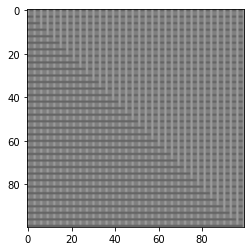

In [28]:
img1 = np.ones(shape = (100,100))*128
for i in range(100):
    if i%3 == 0:
        img1[i, :] = 100
        img1[:, i] = 155
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.show()

In [44]:
filtro1 = np.array([[0, 1, -1, 0],[1, 3, -3, -1], [1, 3, -3, -1],[0, 1, -1, 0]])
filtro1

array([[ 0,  1, -1,  0],
       [ 1,  3, -3, -1],
       [ 1,  3, -3, -1],
       [ 0,  1, -1,  0]])

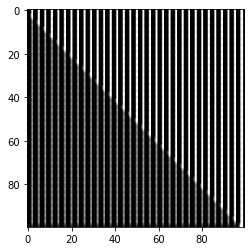

In [45]:
i1 = convolve(img1, filtro1)
plt.imshow(i1, cmap='gray', vmin=0, vmax=255)

# Questão 3



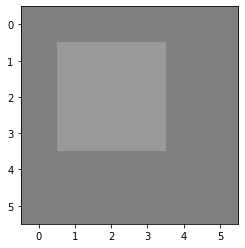

In [29]:
img2 = np.array([[0, 0, 0, 0, 0, 0],[0, 2, 2, 2, 0, 0],[0, 2, 2, 2, 0, 0],[0, 2, 2, 2, 0, 0],[0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0]])
plt.imshow(img2, cmap='gray', vmin=-10, vmax=10)

In [30]:
filtro2 = np.array([[-2, 0, 2],[-2, 0, 2], [-2, 0, 2]])
filtro2

array([[-2,  0,  2],
       [-2,  0,  2],
       [-2,  0,  2]])

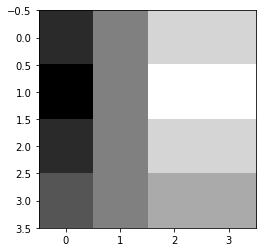

In [32]:
i2 = convolve2d(img2, filtro2, mode ='valid')
plt.imshow(i2, cmap='gray', vmin=-12, vmax=12)

# Questão 4


Observando a imagem dada, e sua forma matricial, conforme mostrado abaixo, vemos que os pontos que representam os olhos e a boca possuem valores negativos, enquanto as demais regiões possuem valor 0. É interessante observar também que os pontos que representam os olhos estão distantes dos demais pontos. Desta maneira, uma solução interessante seria utilizar um filtro que realçasse o valor central e penalizasse a existência de pontos na vizinhança. Isso permite que possamos "aproveitar" a função relu para conseguir destacar só os olhos.

O filtro necessário para realizar este procedimento poderia ser o: $\begin{bmatrix} 1 & 1 & 1 \\ 1 & -1 &  1 \\ 1 & 1 & 1 \end{bmatrix}$

[[ 0  0  0  0  0  0  0]
 [ 0 -1  0  0  0 -1  0]
 [ 0  0  0  0  0  0  0]
 [ 0 -1  0  0  0 -1  0]
 [ 0 -1 -1 -1 -1 -1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]


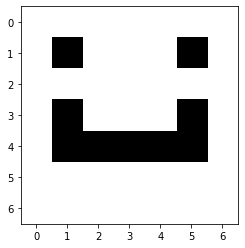

In [5]:
img3 = np.array([[0,0,0,0,0,0,0],[0,-1,0,0,0,-1,0],[0,0,0,0,0,0,0],[0,-1,0,0,0,-1,0], [0,-1,-1,-1,-1,-1,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])
print(img3)
plt.imshow(img3,cmap='gray', vmin=-1, vmax=0)

In [25]:
filtro3 = np.array([[10,10,10],[10,-1,10],[10,1,10]])
filtro4 = np.array([[-3,-3,-3],[-3,8,-3],[-3,-1,-3]])
filtro3

array([[10, 10, 10],
       [10, -1, 10],
       [10,  1, 10]])

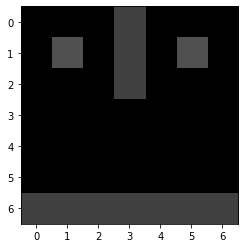

In [30]:
i3 = convolve2d(img3, filtro3, mode ='same')
plt.imshow(i3, cmap='gray', vmin=-4, vmax=12)

In [27]:
i3

array([[ 3,  3,  3,  0,  3,  3,  3],
       [ 3, -8,  3,  0,  3, -8,  3],
       [ 6,  4,  6,  0,  6,  4,  6],
       [ 6, -2, 12,  9, 12, -2,  6],
       [ 6, -4,  1, -2,  1, -4,  6],
       [ 3,  4,  7,  7,  7,  4,  3],
       [ 0,  0,  0,  0,  0,  0,  0]])

# Questão 5

**a)** O modo de padding chamado de _valid_ busca minimizar o uso de padding. Dessa forma, ele só adicionará padding caso seja realmente necessário (ou seja, a combinação de stride e tamanho de filtro não permite a movimentação correta do filtro pela imagem. Sendo assim, no caso informado, não haverá padding, e a dimensão da matriz resultado da convolução será m x m, tal que:

$$m = \frac{n-f}{s} +1 = \frac{8-3}{1} + 1 = 6$$ 
Ou seja, a matriz será 6 x 6

**b)** O modo de padding chamado _same_ busca preservar as dimensões da imagem original de entrada. Por isso, para este caso, temos que m = n, ou seja, m = 8. Aplicando essa informação na fórmula que conta com o padding, e considerando que o padding foi adicionado simetricamente, temos:

$$ m = \bigg{\lfloor}\frac{n - f + p_{antes} + p_{depois}}{s}\bigg{\rfloor} + 1 = \frac{8 - 3 + 2p}{1} + 1 = 8$$   

$$2p +5 + 1 = 8 \rightarrow 2p = 2 \rightarrow p = 1$$

Logo, a dimensão final da matriz é 8x8 e foi adicionado um padding de tamanho 1 de cada lado, totalizando um padding de tamanho 2.

# Questão 6

**a)** Utilizando um stride de 2, passamos a ter:
$$m = \frac{n-f}{s} +1 = \frac{8-3}{2} + 1 = \frac{5}{2} + 1 = 3,5$$  
Como o valor encontrado foi decimal e houve possibilidade de movimentação do filtro, isso significa que no modo _valid_ não deve ser adicionado um padding e parte da matriz de entrada não participará da convolução. Sendo assim, a dimensão da saída será 3x3 e o padding será de 0.

**b)** Seguindo o mesmo raciocínio que na questão anterior, temos:

$$ m = \frac{n - f + p_{antes} + p_{depois}}{s} + 1 = \frac{8 - 3 + 2p}{2} + 1 = 8$$   

$$2p +5 = 14 \rightarrow 2p = 9 \rightarrow p = 4.5$$

Logo, a dimensão final da matriz é 8x8 e foi adicionado um padding de tamanho 4.5 de cada lado, totalizando um padding de tamanho 9.

# Questão 7

Ao utilizar o _same padding_, temos a adição de um padding simetricamente em todos os lados de uma matriz de entrada, de maneira a garantir que a saída possua a mesma dimensão da entrada. Dessa forma, à medida que mudamos o tamanho do filtro, a técnica também alterará o tamanho do padding adicionado. Por isso, é possívle passar o mesmo filtro sucessivas vezes sobre o volume de entrada ao utilizar esse procedimento.

# Questão 8

Utilizando o _valid padding_, a única forma de se obter uma imagem de saída com dimensões 2D iguais às da entrada é caso utilizemos um filtro com dimensões 1x1. Isso pode ser confirmado com a fórmula para cálculo das dimensões de saída, da seguinte forma:

$$ m= \bigg{\lfloor}\frac{n - f}{s}\bigg{\rfloor} + 1 = \bigg{\lfloor}\frac{n - 1}{1}\bigg{\rfloor} + 1 =  n-1+1 = n \rightarrow m = n$$   

___
<a id="Lista2"></a><b><p style="text-align:center;font-size:24px">Lista de Exercícios 2</p> </b> 
___

# Questão 1

Podemos utilizar a seguinte fórmula para calcular o volume de saída:

$$m = \bigg{\lfloor}\frac{n - f + }{s}\bigg{\rfloor} + 1$$

onde, $p_{antes} = p_{depois} = 0$, $n=63$, $f = 7$ e $s = 2$. Como tanto a entrada quanto o filtro são quadrados, não há a necessidade de realizar os cálculos para as duas dimensões. Por fim, como o filtro obrigatoriamente deverá ter a mesma profundidade que a entrada, o filtro será de 7 x 7 x 16, mas esta informação não influencia diretamente no cálculo. Portanto:

$$m = \bigg{\lfloor}\frac{63 - 7 + 0 + 0}{2}\bigg{\rfloor} + 1 = \frac{56}{2} + 1  = 24$$

Logo, as dimensões do volume de saída serão: $ 24 \times 24 \times 32 $, pois temos 32 filtros.

# Questão 2

Se a operação consiste apenas de aplicar o padding = 2, então teremos que padding antes e padding depois serão iguais, pois o padding geralmente é adicionado simetricamente, a menos que o contrário seja explicitado. Logo, as dimensões de saída serão: $(2 + 15 + 2) \times (2 + 15 + 2) \times 8 = 19 \times 19 \times 8$. 

# Questão 3

Se tratarmos o padding como simétrico, teremos: $ p_{antes} = p_{depois} = p$. Sendo assim, podemos calcular o valor do padding para obter o padding _same_ igualando $m=n = 63$ na fórmula:

$$m = \bigg{\lfloor}\frac{n - f + p_{antes} + p_{depois}}{s}\bigg{\rfloor} + 1$$  

$$n = \bigg{\lfloor}\frac{n - f + 2p}{s}\bigg{\rfloor} + 1 \rightarrow 63 = \bigg{\lfloor}\frac{63 - 7 + 2p}{1}\bigg{\rfloor} + 1$$

$$62 = 56 + 2p \rightarrow 2p = 6 \rightarrow p = 3$$

Logo, um padding de 3 deverá ser usado.

# Questão 4

Para calcular o número de multiplicações, precisamos calcular o volume de saída e realizar a seguinte operação:

$\text{ número de multiplicações} = X = \text{volume do filtro} \times \text{volume de saída}$


**a)** $m = \bigg{\lfloor}\frac{n - f + 2p}{s}\bigg{\rfloor} + 1 = 65 - 11 + 1 = 55$ 
$X = (11 \times 11 \times 3) \times (55 \times 55 \times 1)  = 1.098.075$


**b)** $m = \bigg{\lfloor}\frac{n - f + 2p}{s}\bigg{\rfloor} + 1 = \bigg{\lfloor}\frac{65 - 11}{3}\bigg{\rfloor} +1 = 19$ 
$X = (11 \times 11 \times 3) \times (19 \times 19 \times 1)  = 131.043$

**c)** Se o same padding é utilizado, não há necessidade de calcular o volume de saída, pois este será igual ao de entrada. Logo:
$X = (11 \times 11 \times 3) \times (65 \times 65 \times 1)  = 1.533.675$

**d)** $X = (11 \times 11 \times 3) \times (65 \times 65 \times 1)  = 1.533.675$

# Questão 5

**a)** $m = \bigg{\lfloor}\frac{n - f + 2p}{s}\bigg{\rfloor} + 1 = 65 - 5 + 1 = 61$ 
$X = (5 \times 5 \times 3) \times (61 \times 61 \times 1)  = 279.075$

**c)** Se o same padding é utilizado, não há necessidade de calcular o volume de saída, pois este será igual ao de entrada. Logo:
$X = (5 \times 5 \times 3) \times (65 \times 65 \times 1)  = 316.875$

# Questão 6

O tamanho da saída de uma operação de pooling pode ser calculada da mesma forma que o tamanho da saída de uma operação de convolução. A única diferença é que a profundidade da saída será igual à profundidade da entrada. Desta maneira:

$$ m = \bigg{\lfloor}\frac{n - f + 2p}{s}\bigg{\rfloor} + 1 =  m = \bigg{\lfloor}\frac{32 - 2}{2}\bigg{\rfloor} + 1 = 16$$

Logo, a saída terá dimensões: $16 \times 16 \times 16$

# Questão 7 

**a)** 

# Questão 8 

# Questão 9 

# Questão 10

n = 32 = dimensão da entrada (quadrada)  
c = 3 = nº de canais  
f = 5 = dimensão do filtro (quadrado)  
d = 8 = nº de filtros  
_valid padding_ → p = 0  
s = 2 = tamanho do _stride_/passo  

$$ m = \bigg{\lfloor}\frac{n - f + 2p}{s}\bigg{\rfloor} + 1 = \bigg{\lfloor}\frac{32 - 5 + 0}{2}\bigg{\rfloor} + 1 = 13 + 1 = 14$$


A dimensão da saída será $14 \times 14 \times 8$

# Questão 11

n = 224
c = 3




$$\bigg{\lfloor}\frac{n - f + 2p}{s}\bigg{\rfloor} + 1$$

# Questão 12

Primeira camada convolucional → $ 5 \times 5 \times 3 \times 8  + 8 = 608$ parâmetros  
Primeira camada de pooling → $0$ parâmetros  
Segunda camada convolcuional → $ 5 \times 5 \times 8 \times 16 + 16 = 3216$ parâmetros  
Segunda camada de pooling → $0$ parâmetros  
Camada fully connected 1 → $ 5 \times 5 \times 16 \times 120 + 120= 48.120$ parâmetros  
Camada fully connected 2 → $ 120 \times 84 + 84 = 10164$ parâmetros  
Camada Softmax → $ 84 \times 10 + 10$ = 850 parâmetros

**Total** = 608 + 0 + 3.216 + 0 + 48.120 + 10.164 + 850 = **62.958** 



___
<a id="Lista3"></a><b><p style="text-align:center;font-size:24px">Lista de Exercícios 3</p> </b> 
___

# Questão 1 

# Questão 2 

Para conseguir reduzir somente o número de canais de uma camada, podemos utilizar camadas de convolução 1x1, com a quantidade de filtros igual à quantidade de canais desejada para a saída, que neste caso será nf < nC.


Neste caso existem duas opções: a primeira delas seria utilizar convoluções com _valid padding_ e o número de filtros igual ao número de canais da entrada. A segunda opção é usar uma camada de pooling.

# Questão 3 

Entrada:
nW = 28 
nH = 28
nC = 192

Filtro: 
fW = 5
fH = 5
fC = 192
nF = 32

O uso do _same padding_ significa que a saída terá a mesma dimensão bidimensional da entrada. Logo, a dimensão saída será $28 \times 28 \times 32$. 

Desta maneira, temos que foram realizadas:  
$(28 \times 28 \times 32) \times (5 \times 5 \times 192) = 25.088 \times 4.800 = 120.422.400$ de multiplicações


A aplicação dos 16 filtros $1 \times 1$ faz com que a entrada da camada de convolução com filtros $5 \times 5$ passe a ter as dimensões $28 \times 28 \times 16$ e, portanto, os filtros terão profundidade reduzida de 192 para 16. Desta forma, o novo número de multiplicações realizadas será:  

$$(28 \times 28 \times 32) \times (5 \times 5 \times 16) = 25.088 \times 400 = 10.035.200$$

# Questão 4 

# Questão 5 

# Questão 6 

# Questão 7 

A saída da primeira camada convolucional do bloco pode ser escrita como $ a^{[l+1]}$:

$$ a^{[l+1]} = g(W^{[l+1]} * a^{[l]} + b^{[l+1]})$$

De maneira similar, a saída da segunda camada convolucional do bloco $a^{[l+2]'}$ é:

$$ a^{[l+2]'} = W^{[l+2]} * a^{[l+1]} + b^{[l+2]} = W^{[l+2]} * g(W^{[l+1]} * a^{[l]} + b^{[l+1]}) + b^{[l+2]}$$

Como há a _skip-connection_, somamos a entrada do bloco à saída, de maneira que:

$$ a^{[l+2]} = g(a^{[l+2]'} + a^{[l]}) = g(W^{[l+2]} * g(W^{[l+1]} * a^{[l]} + b^{[l+1]}) + b^{[l+2]} + a^{[l]})$$

# Questão 8 

# Questão 9 

Se aplicamos um filtro $1 \times 1$ em uma entrada $64 \times 64 \times 16$, isso significa que o filtro possui dimensão $1 \times 1 \times 16$, logo, este filtro possuirá $16 + 1 = 17$ parâmetros, incluindo o bias. 

# Questão 10 

# Questão 11 

# Questão 12 